***

# Logistic Regression - Classification

***

$$ y_j = \dfrac {1}{1+e^{-(w_0+w_1x_1+w_2x_2+...+w_jx_j)}} $$

#### sigmoid function

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [176]:
x=np.arange(-7,7,0.1)

In [177]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [178]:
y=sigmoid(x)

Text(0.5, 1.0, 'Sigmoid function')

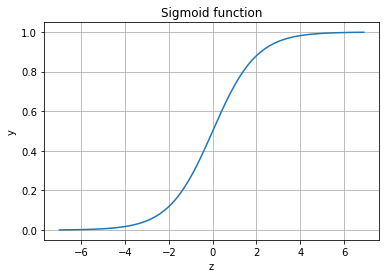

In [179]:
plt.plot(x,y)
plt.grid()
plt.xlabel('z')
plt.ylabel('y')
plt.title('Sigmoid function')

typically when y<0.5 y=0 and when y>0.5 y=1

therefore z=0 is the boundary

#### decision boundary

$$ y=1  =>  z>0  =>  w_0+w_1x_1+w_2x_2>0  $$

$$ x_2=\dfrac {w_0+w_1x_1}{w_2}  $$

Text(0.5, 1.0, 'Decision boundary')

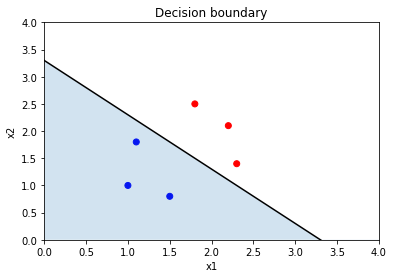

In [174]:
x=np.arange(0,6)
y=3.3-x
x1=np.array([1,1.5,1.1,1.8,2.3,2.2])
x2=np.array([1,0.8,1.8,2.5,1.4,2.1])
col = np.where(x2<(-x1+3.3),'b','r')
plt.scatter(x1,x2,color=col)
plt.plot(x,y,c='k')
plt.fill_between(x,y,alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0,4)
plt.ylim(0,4)
plt.title('Decision boundary')

#### decision boundary can be a circle as well, not only a str8 line

its like a x1 x2 line of a waterfall where up is 1 and down is 0 for y

in the blue area y=0, in the white area y=1

## Cost function

MSE for logistic regression is not convex function, as it has many local minimums therefore it is not the best choice for the cost function

$$ J = \frac{1}{m} \sum_{i=0}^{m-1} loss(f_w(x^{(i)}),y^{(i)})  $$

$$ J = -\frac{1}{m} \sum_{i=0}^{m-1} [y^{(i)}\log(f_w(x^{(i)})) + (1-y^{(i)})\log(1-f_w(x^{(i)}))]  $$

f(x) is sigmoid so takes values from 0 to 1

#### Logistic loss function


\begin{equation}
loss(f_w(x^{(i)}),y^{(i)}) = \begin{cases}
    - \log(f_w(x^{(i)}))   & if& y^{(i)}=1\\
    - \log(1-f_w(x^{(i)}))  &  if& y^{(i)}=0
    \end{cases}
\end{equation}

or simplified

$$ loss(f_w(x^{(i)}),y^{(i)}) = - y^{(i)}\log(f_w(x^{(i)})) - (1-y^{(i)})\log(1-f_w(x^{(i)})) $$

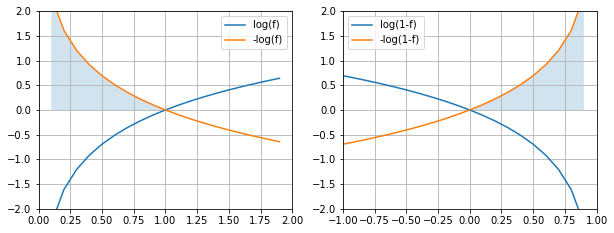

In [51]:
x=np.arange(0,2,0.1)
y=np.log(x)
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.plot(x,y,label='log(f)')
plt.plot(x,-y,label='-log(f)')
x=np.arange(0,1.1,0.1)
y=np.log(x)
plt.fill_between(x,-y,alpha=0.2)
plt.xlim(0,2)
plt.ylim(-2,2)
plt.grid()
plt.legend()

plt.subplot(222)
x=np.arange(-1,1,0.1)
y=np.log(1-x)
plt.plot(x,y,label='log(1-f)')
plt.plot(x,-y,label='-log(1-f)')
x=np.arange(0,1.1,0.1)
y=np.log(1-x)
plt.fill_between(x,-y,alpha=0.2)
plt.xlim(-1,1)
plt.ylim(-2,2)
plt.grid()
plt.legend()

In [53]:
import numpy as np

In [64]:
x=np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y=np.array([0,0,0,1,1,1])

In [65]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [73]:
def cost(x,y,w,w0):
    cost=0
    rows,features=x.shape
    for row in range(rows):
        f=sigmoid(np.dot(x[row],w)+w0)
        cost+=-y[row]*np.log(f)-(1-y[row])*np.log(1-f)
    cost=cost/rows
    return cost

In [96]:
w=np.array([1,1])
b1=-3
b2=-3.3
print(f'Cost for b=-3: {cost(x,y,w,b1)}')
print(f'Cost for b=-3.3 : {cost(x,y,w,b2)}')

Cost for b=-3: -0.36686678640551745
Cost for b=-3.3 : -0.3870815248579363


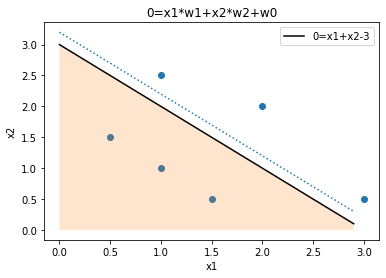

In [100]:
x1=np.arange(0,3,0.1)
x2=3-x1
plt.scatter(x[:,0],x[:,1])
plt.plot(x1,x2,c='k',label='0=x1+x2-3')
x2=3.2-x1
plt.plot(x1,x2,linestyle=':')
plt.fill_between(X,Y,alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('0=x1*w1+x2*w2+w0')
plt.legend()

## Gradient descent

$$ dw_j=\frac{1}{m} \sum_{i=0}^{m-1} (f(x^{(i)})-y^{(i)})*x^{(i)}_j $$

$$ f(x^{(i)})=\dfrac {1}{1+e^{-(w_0+w_1x_1+w_2x_2+...+w_jx_j)}} $$

In [102]:
import numpy as np

In [116]:
x=np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y=np.array([0,0,0,1,1,1])
w=np.array([2,3])
w0=1

In [122]:
def gradient(x,y,w,w0):
    rows,features=x.shape
    dw=np.zeros(features)
    dw0=0
    for feature in range(features):
        for row in range(rows):
            dw[feature]+=(sigmoid(np.dot(x[row],w)+w0)-y[row])*x[row][feature]
    for row in range(rows):
        dw0+=sigmoid(np.dot(x[row],w)+w0)-y[row]
    dw=dw/rows
    dw0=dw0/rows
    return dw,dw0

In [123]:
dw,dw0=gradient(x,y,w,w0)
print(f'dw: {dw}, dw0: {dw0}')

dw: [0.49833339 0.49883943], dw0: 0.49861806546328574


In [147]:
def gradient_descent(x,y,w,w0,steps=1000,alpha=0.01):
    for step in range(steps):
        dw,dw0=gradient(x,y,w,w0)
        w-=alpha*dw
        w0-=alpha*dw0
        loss=cost(x,y,w,w0)
        if step%100==0:
            print(f'STEP: {step} - loss: {loss}')
    return w,w0

In [148]:
x=np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y=np.array([0,0,0,1,1,1])
w=np.array([0.,0.])
w0=0.

In [149]:
w_out,w0_out=gradient_descent(x,y,w,w0,steps=10000,alpha=0.1)
print(f'Updated parameters: w: {w_out}, w0: {w0_out}')

STEP: 0 - loss: -0.684610468560574
STEP: 1000 - loss: -0.1590977666870457
STEP: 2000 - loss: -0.08460064176930078
STEP: 3000 - loss: -0.05705327279402531
STEP: 4000 - loss: -0.04290759421682
STEP: 5000 - loss: -0.03433847729884557
STEP: 6000 - loss: -0.02860379802212006
STEP: 7000 - loss: -0.02450156960879306
STEP: 8000 - loss: -0.02142370332569295
STEP: 9000 - loss: -0.019030137124109114
Updated parameters: w: [5.28123029 5.07815608], w0: -14.222409982019837


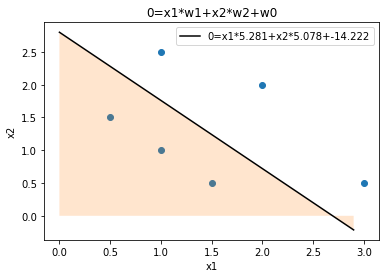

In [158]:
x1=np.arange(0,3,0.1)
x2=(-w0_out-x1*w_out[0])/w_out[1]
plt.scatter(x[:,0],x[:,1])
plt.plot(x1,x2,c='k',label=f'0=x1*{w_out[0]:.3f}+x2*{w_out[1]:.3f}+{w0_out:.3f}')
plt.fill_between(x1,x2,alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'0=x1*w1+x2*w2+w0')
plt.legend()

## Scikit-Learn logistc regression

In [160]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [161]:
x=np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]])
y=np.array([0,0,0,1,1,1])

In [163]:
lr_model=LogisticRegression()
lr_model.fit(x,y)

LogisticRegression()

In [167]:
pred=lr_model.predict(x)
print(f'prediction: {pred}')
print(f'accuracy: {lr_model.score(x,y)}')

prediction: [0 0 0 1 1 1]
accuracy: 1.0
